## Predicting House Prices, Rent Prices, and Cap Rates in Israel 📈

<a ></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">Table of contents</div>

* [1. Introduction](#1) 
    
* [2. Import Libraries](#2)
    
* [3. Attributes](#3)
    
* [4. Data Preprocessing](#4)
    
* [5. Data Analysis](#5)
    
* [6. Model Training](#6)
    
* [7. Conclusion](#7)   

<a id="1"></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">1. Introduction</div>

- The prediction of house prices is a crucial task in the real estate market, as it allows both buyers and sellers to make informed decisions. In the context of Israel, where the housing market is dynamic and constantly evolving, accurate price predictions can significantly impact individuals, investors, and the overall economy. In this Jupyter notebook, we delve into the realm of predicting house prices in Israel, utilizing advanced machine learning techniques to analyze various factors that influence property values.

- This dataset comprises from houses captured at websites like yad2 and ad.co.il. It's a classic dataset to explore and understand how to solve regression problem.

- Our goal: predict where is the most profitable place to buy and rent a house

- Were going to achieve our goal by calculating the capitalization rate of each asset.

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-color:black; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 What is cap rate?:</font></h3>

- The capitalization rate, or cap rate for short, is a financial metric used in real estate investing to evaluate the potential return on investment for a property. It is essentially a ratio that measures the net operating income (NOI) generated by a property relative to its market value.

- To calculate the capitalization rate (cap rate) for a property, you'll need to determine the property's net operating income (NOI) and its current market value or purchase price. 

- The formula: Cap Rate = (Net Operating Income / Property Value) * 100

Example: rent price: 4000, house price: 2,000,000

Cap Rate = ((4000 * 12) / 2000000) * 100 = 2.4%

<a id="2"></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">2. Import libraries 📚</div>

In [99]:
import pandas as pd
import numpy as np
import xgboost as xgb
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error as MAE, mean_squared_error as MSE, r2_score as R2
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt
import seaborn as sns


import warnings# warning filter
warnings.filterwarnings("ignore")
%matplotlib inline

<a id="3"></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">3. Attributes 📋</div>

The dataset has **115445** rows and **15 columns**

| Column Name     | Data type |
|-----------------|-----------|
| `City`          | object    |
| `neighborhood	` | object    |                           
| `house type`    | object    |                           
| `house_area`    | float     |                              
| `garden_area`   | float     |                 
| `rooms`         | float     |               
| `balconies`     | float     | 
| `parking`       | binary    |             
| `protected_room`| binary    |                        
| `elevator`      | binary    |                  
| `renovated`     | binary    |                                    
| `furniture`     | binary    |                 
| `accessibility` | binary    |                 
| `bars`          | binary    |    
| `price`         | binary    |            

                                            

In [100]:
df = pd.read_csv('../tables/sales.csv')
df.head()

,city,neighborhood,house type,house_area,garden_area,rooms,balconies,air_condition,parking,protected_room,elevator,renovated,furniture,accessibility,bars,storage,price
0,תל אביב יפו,הצפון הישן החלק הדרום מזרחי,דירה,85,0,4.0,0,1,0,1,1,1,0,1,0,0,4690000
1,קרית גת,מלכי ישראל,דו משפחתי,254,226,8.0,2,1,1,1,0,1,0,1,0,1,3300000
2,תל אביב יפו,הצפון הישן החלק המרכזי,דירה,102,0,4.0,1,1,0,0,1,0,1,0,0,0,5500000
3,באר שבע,שכונה ד,דירה,60,0,3.5,1,1,1,0,0,1,0,1,1,0,777000
4,באר שבע,אין,דירה,202,0,5.0,2,1,1,1,1,1,0,1,0,1,2600000


In [101]:
df.describe()

,house_area,garden_area,rooms,balconies,air_condition,parking,protected_room,elevator,renovated,furniture,accessibility,bars,storage,price
count,1.154450e+05,115445.000000,115444.000000,115445.000000,115445.000000,115445.000000,115445.000000,115445.000000,115445.000000,115445.000000,115445.000000,115445.000000,115445.000000,1.154450e+05
mean,3.177261e+02,54.311031,4.205008,0.842202,0.822409,0.680107,0.559470,0.512885,0.501044,0.183126,0.484967,0.243674,0.442982,3.609138e+06
std,5.744041e+03,615.057476,1.643739,0.764341,0.382170,0.466437,0.496453,0.499836,0.500001,0.386861,0.499776,0.429300,0.496740,9.597476e+06
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,9.000000e+01,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.690000e+06
50%,1.200000e+02,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.650000e+06
75%,1.800000e+02,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,4.000000e+06
max,1.111111e+06,111111.000000,12.500000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.147484e+09


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115445 entries, 0 to 115444
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   city            115444 non-null  object 
 1   neighborhood    105888 non-null  object 
 2   house type      115445 non-null  object 
 3   house_area      115445 non-null  int64  
 4   garden_area     115445 non-null  int64  
 5   rooms           115444 non-null  float64
 6   balconies       115445 non-null  int64  
 7   air_condition   115445 non-null  int64  
 8   parking         115445 non-null  int64  
 9   protected_room  115445 non-null  int64  
 10  elevator        115445 non-null  int64  
 11  renovated       115445 non-null  int64  
 12  furniture       115445 non-null  int64  
 13  accessibility   115445 non-null  int64  
 14  bars            115445 non-null  int64  
 15  storage         115445 non-null  int64  
 16  price           115445 non-null  int64  
dtypes: float64

In [103]:
df.apply(lambda x: len(x.unique()))

city               781
neighborhood      1748
house type          47
house_area        1160
garden_area        744
rooms               26
balconies            6
air_condition        2
parking              2
protected_room       2
elevator             2
renovated            2
furniture            3
accessibility        2
bars                 2
storage              2
price             2649
dtype: int64

In [104]:
df['price'].describe()

count    1.154450e+05
mean     3.609138e+06
std      9.597476e+06
min      0.000000e+00
25%      1.690000e+06
50%      2.650000e+06
75%      4.000000e+06
max      2.147484e+09
Name: price, dtype: float64

<a id="4"></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">4. Data Preprocessing 💻</div>

In [105]:
df.isnull().sum()

city                 1
neighborhood      9557
house type           0
house_area           0
garden_area          0
rooms                1
balconies            0
air_condition        0
parking              0
protected_room       0
elevator             0
renovated            0
furniture            0
accessibility        0
bars                 0
storage              0
price                0
dtype: int64

In [106]:
df = df.drop(columns=['neighborhood'])

In [107]:
df = df.dropna()

In [108]:
df[df.duplicated()].shape[0]

25676

In [109]:
df = df.drop_duplicates()

In [110]:
not_to_small = df["house_area"] > 15
not_to_big = df["house_area"] < 500
garden_not_to_big = df["garden_area"] < 500
garden_not_to_small = df["garden_area"] >= 0
furniture = df["furniture"] < 2

df = df.where(not_to_small & not_to_big & garden_not_to_big & garden_not_to_small & furniture).dropna()

In [111]:
# homes that are between 200,00 and 15,000,000 shekels and reasonbale price per square meter
not_to_cheap = df["price"] > 200000
not_to_expensive= df["price"] < 15000000

#df = df.where(not_to_cheap & not_to_expensive).dropna()

df["price_per_square_meter"] = df["price"] / df["house_area"]
not_to_expensive_for_squre_meter = df["price_per_square_meter"] < 100000
not_to_cheap_for_squre_meter = df["price_per_square_meter"] > 4000
df = df.where(not_to_cheap & not_to_expensive  & not_to_expensive_for_squre_meter  & not_to_cheap_for_squre_meter ).dropna()

# drop homes with less than 2 rooms or more than 10 rooms
not_to_little_rooms = df["rooms"] >= 2
not_to_many_rooms = df["rooms"] <= 10
df = df.where ( not_to_little_rooms & not_to_little_rooms ).dropna()

In [112]:
df = df.drop(columns=['price_per_square_meter'])

In [113]:
df['house type'].unique()

array(['דירה', 'דו משפחתי', 'Квартира', 'דירת גן', 'דופלקס',
       'בית פרטי/קוטג', 'גג/פנטהאוז', 'פרטי/קוטג', 'בית פרטי', 'קוטג',
       'פנטהאוז', 'כללי', 'תיירות ונופש', 'דירת סטודיו', 'טריפלקס',
       'דירת גג', 'מרתף/פרטר', 'מגרשים', 'דיור מוגן', 'יחידת דיור',
       'סטודיו/לופט', 'משק חקלאי', 'וילה', 'משק חקלאי/נחלה',
       'בניין מגורים', 'דירת נופש', 'מגרש למגורים', 'מחסן',
       'פרטי/קוטג&nbsp;', 'גג/פנטהאוז&nbsp;', 'דופלקס&nbsp;',
       "בית פרטי/קוטג'"], dtype=object)

In [114]:
df['house type'] = df['house type'].str.replace('&nbsp;', '')
df['house type'] = df['house type'].str.replace('/קוטג', '')
df['house type'] = df['house type'].str.replace("'", '')

In [115]:
df['house type'].unique()

array(['דירה', 'דו משפחתי', 'Квартира', 'דירת גן', 'דופלקס', 'בית פרטי',
       'גג/פנטהאוז', 'פרטי', 'קוטג', 'פנטהאוז', 'כללי', 'תיירות ונופש',
       'דירת סטודיו', 'טריפלקס', 'דירת גג', 'מרתף/פרטר', 'מגרשים',
       'דיור מוגן', 'יחידת דיור', 'סטודיו/לופט', 'משק חקלאי', 'וילה',
       'משק חקלאי/נחלה', 'בניין מגורים', 'דירת נופש', 'מגרש למגורים',
       'מחסן'], dtype=object)

In [116]:
house_type_counts = df['house type'].value_counts().sort_values(ascending=False)
print(house_type_counts)

דירה              50216
בית פרטי           7830
דירת גן            5984
גג/פנטהאוז         5079
דו משפחתי          2660
דופלקס             2115
פרטי                199
טריפלקס              99
פנטהאוז              51
קוטג                 38
דירת גג              34
תיירות ונופש         32
כללי                 24
מרתף/פרטר            24
דירת נופש            21
דיור מוגן            18
וילה                 16
בניין מגורים         12
מגרשים                9
יחידת דיור            7
סטודיו/לופט           5
משק חקלאי             5
משק חקלאי/נחלה        4
מחסן                  3
Квартира              2
מגרש למגורים          2
דירת סטודיו           1
Name: house type, dtype: int64


In [117]:
types_to_keep = ['דירה', 'בית פרטי', 'דירת גן', 'גג/פנטהאוז', 'דו משפחתי', 'דופלקס', 'פרטי']

df = df[df['house type'].isin(types_to_keep)]

In [118]:
list_to_replace = ['דירה', 'בית פרטי', 'דירת גן', 'גג/פנטהאוז', 'דו משפחתי', 'דופלקס', 'פרטי']
replce_with = ['apartment', 'private house', 'garden apartment', 'penthouse', 'dual family', 'duplex', 'private house' ]
df = df.replace(to_replace =list_to_replace, value =replce_with)

In [119]:
house_type_counts = df['house type'].value_counts().sort_values(ascending=False)
print(house_type_counts)

apartment           50216
private house        8029
garden apartment     5984
penthouse            5079
dual family          2660
duplex               2115
Name: house type, dtype: int64


In [120]:
city_counts = df['city'].value_counts()
top_10_cities = city_counts.head(10)
print(top_10_cities)

תל אביב יפו    8252
ירושלים        5027
באר שבע        4195
חיפה           4122
ראשון לציון    2591
נתניה          2580
אשדוד          2337
פתח תקווה      2336
רמת גן         2329
אשקלון         2047
Name: city, dtype: int64


In [121]:
top_cities_list = top_10_cities.index.tolist()
df = df[df['city'].isin(top_cities_list)]

In [122]:
list_to_replace = ['תל אביב יפו', 'ירושלים', 'חיפה', 'באר שבע', 'רמת גן', 'נתניה', 'פתח תקווה', 'ראשון לציון', 'אשדוד', 'אשקלון']
replce_with = ['tel aviv', 'jerusalem', 'haifa', 'beer sheva', 'ramat gan', 'natanya', 'petah tikva', 'rishon lezion', 'ashdod', 'ashkelon']
df = df.replace(to_replace =list_to_replace, value =replce_with)

<a id="5"></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">5. Data Analysis 📊 </div>

In [123]:
df['price'].describe()

count    3.581600e+04
mean     3.346062e+06
std      2.278038e+06
min      2.500000e+05
25%      1.870000e+06
50%      2.740000e+06
75%      4.100000e+06
max      1.500000e+07
Name: price, dtype: float64

In [124]:
temp_df = df['price'] / 1000000
print(temp_df)

0         4.690
2         5.500
3         0.777
4         2.600
6         2.650
          ...  
115420    1.030
115429    2.090
115432    9.000
115438    0.795
115440    2.200
Name: price, Length: 35816, dtype: float64


<Axes: xlabel='price', ylabel='Density'>

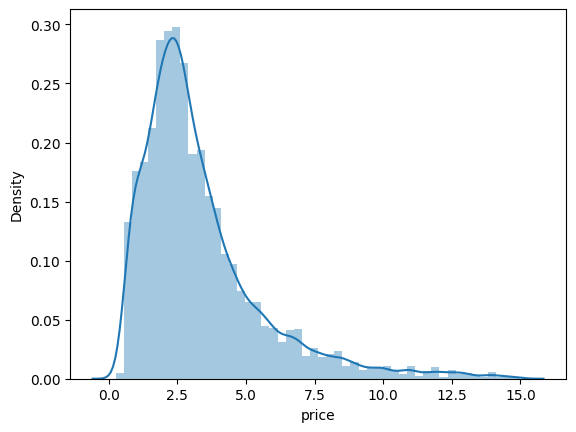

In [125]:
sns.distplot(temp_df)

Text(0.5, 1.0, 'Home Price: $\\mu=3346062$, $\\sigma=2278038$')

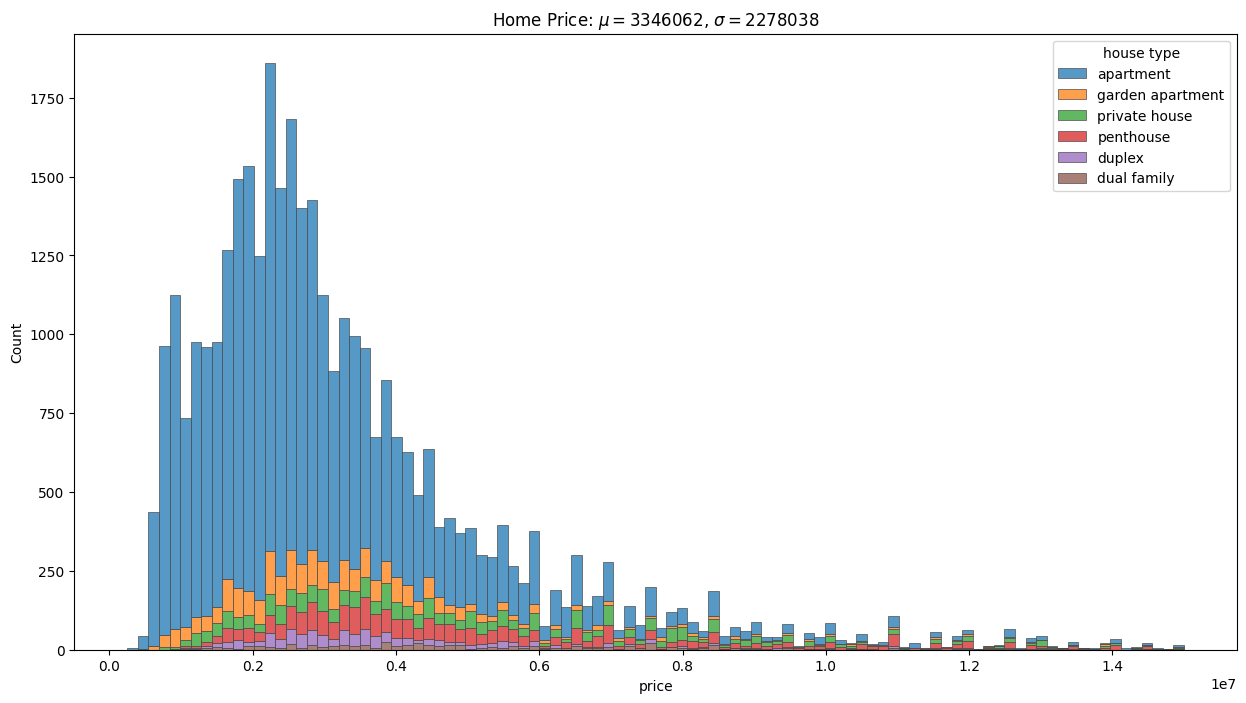

In [126]:
plt.figure(figsize=(15,8))
sns.histplot(df, x="price", hue="house type", multiple="stack", palette="tab10", edgecolor=".3", linewidth=.5, bins = 100 )

# get the mean and the standard devation value of home price
mean = df['price'].mean()
std =  df['price'].std()
plt.title(r'Home Price: $\mu='+str(round(mean))+'$, $\sigma=' +str(round(std))+'$')

Text(0.5, 1.0, 'Home size: $\\mu=121$, $\\sigma=66$')

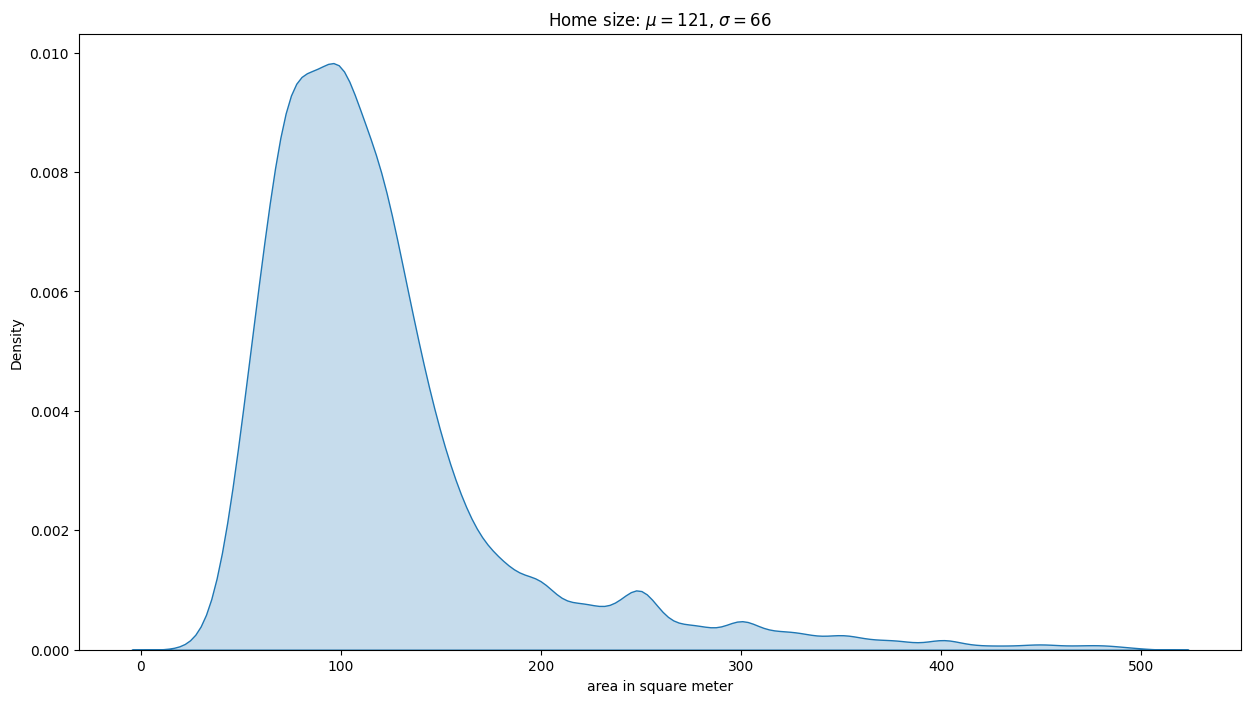

In [127]:
plt.figure(figsize=(15,8))
sns.kdeplot(df.house_area,  shade=True)
plt.xlabel('area in square meter')

mean = df['house_area'].mean()
std =  df['house_area'].std()
plt.title(r'Home size: $\mu='+str(round(mean))+'$, $\sigma=' +str(round(std))+'$')

In [128]:
num_col = df.select_dtypes('number').columns.to_list()
num_col.pop() # remove the column Purchase
cat_col = df.select_dtypes('object').columns.to_list()
df_cat = df[cat_col]
df_num = df[num_col]

Text(0.5, 1.0, 'average price by city')

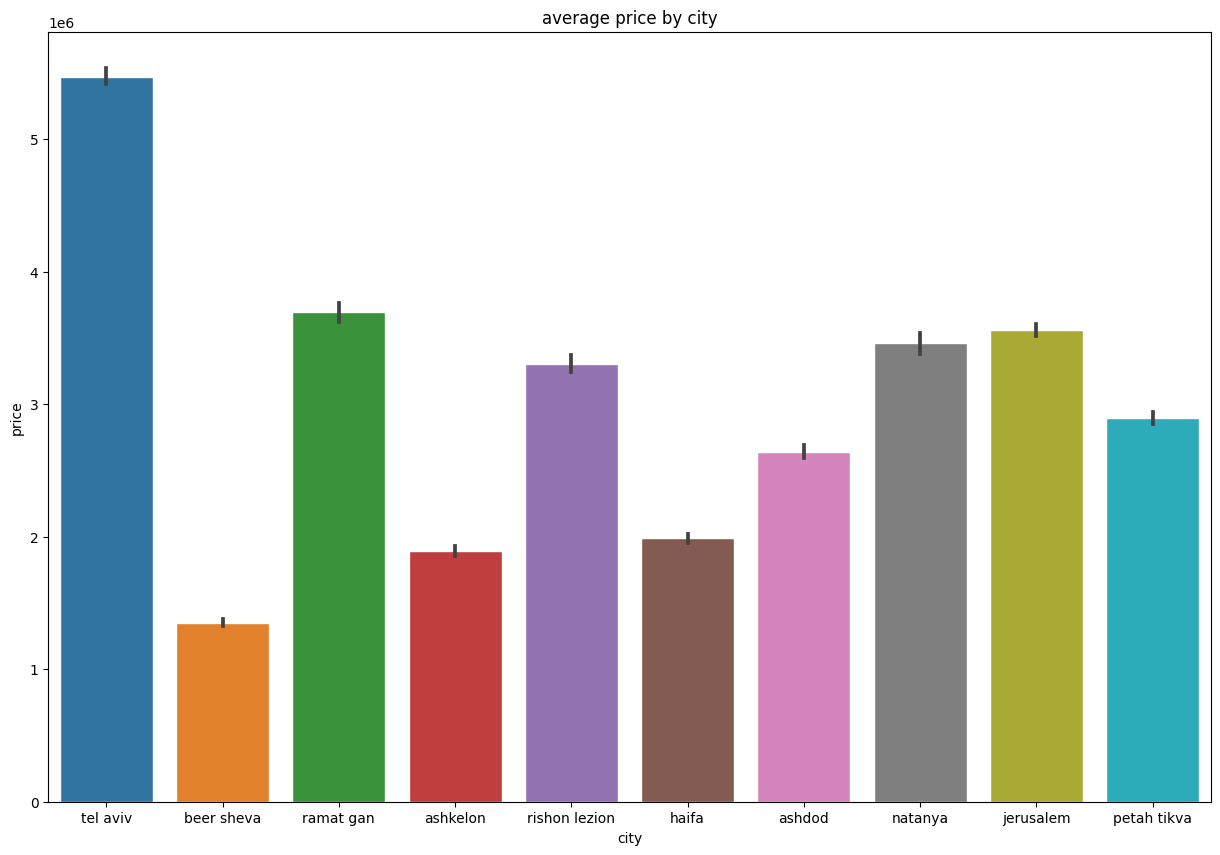

In [129]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'city', y = 'price' , data = df, edgecolor = 'w').set_title('average price by city')

Text(0.5, 1.0, 'average price for squre meter by city and')

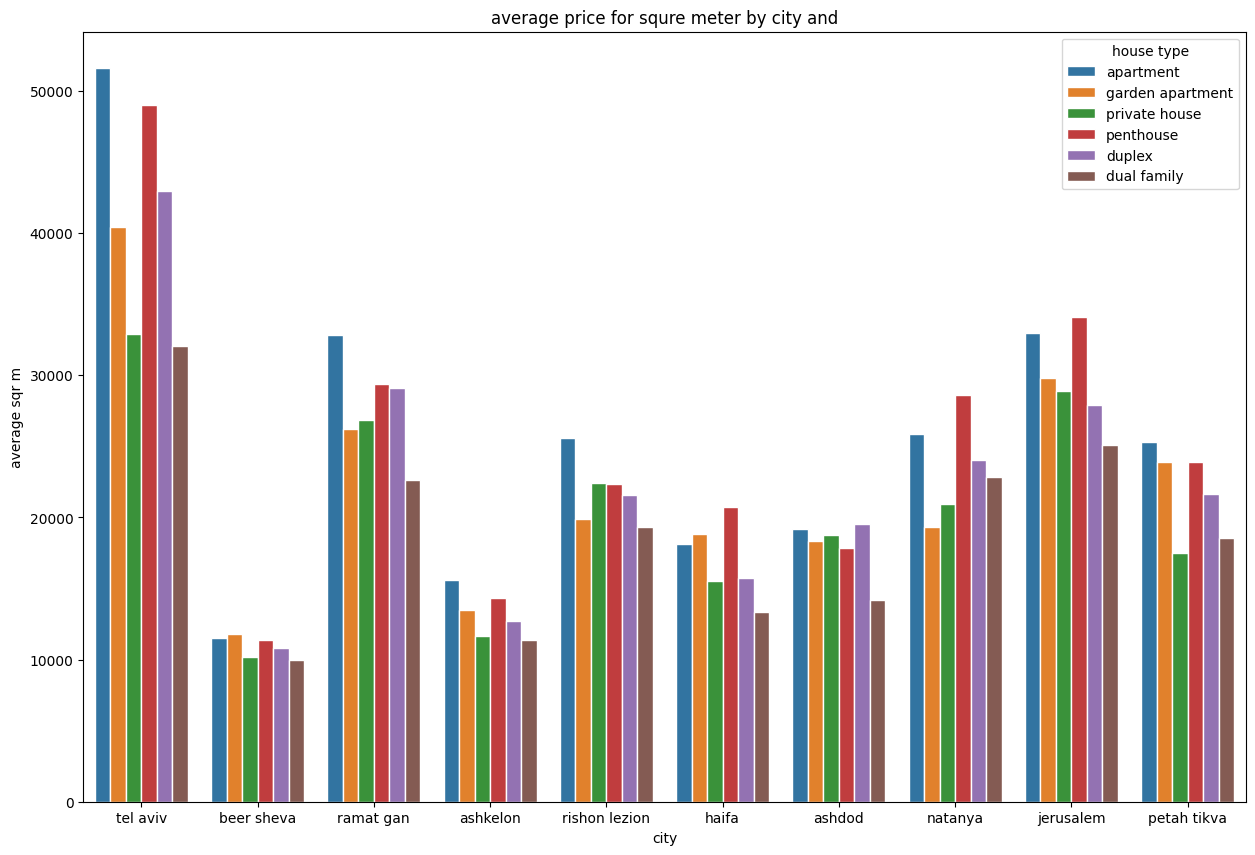

In [130]:
#founfing average size and average price
average_area = df.groupby(['city','house type'])["house_area"].mean()
average_area = average_area.to_frame()
average_area.columns = ['average area']

average_price = df.groupby(['city','house type'])["price"].mean()
average_price = average_price.to_frame()
average_price.columns = ['average price']

# merging
df_avg = pd.merge(average_price,average_area,on=['city','house type'])
df_popular_cities = pd.merge(df, df_avg, on=['city','house type'])
df_popular_cities["average sqr m"] =df_popular_cities["average price"] / df_popular_cities["average area"]

#ploting
plt.figure(figsize=(15, 10))
sns.barplot(x = 'city', y = 'average sqr m' , hue = "house type", data = df_popular_cities, edgecolor = 'w').set_title('average price for squre meter by city and')

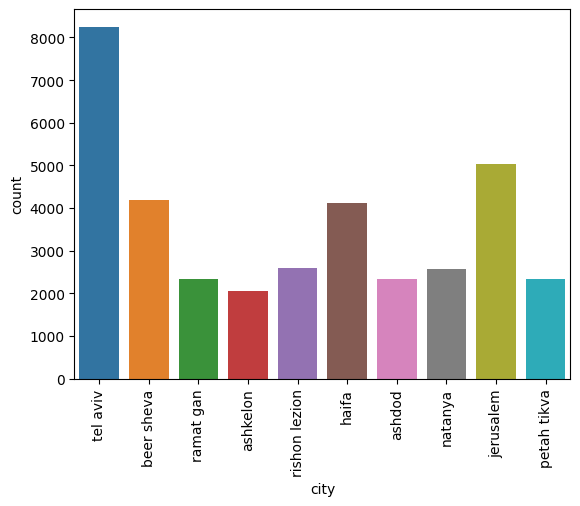

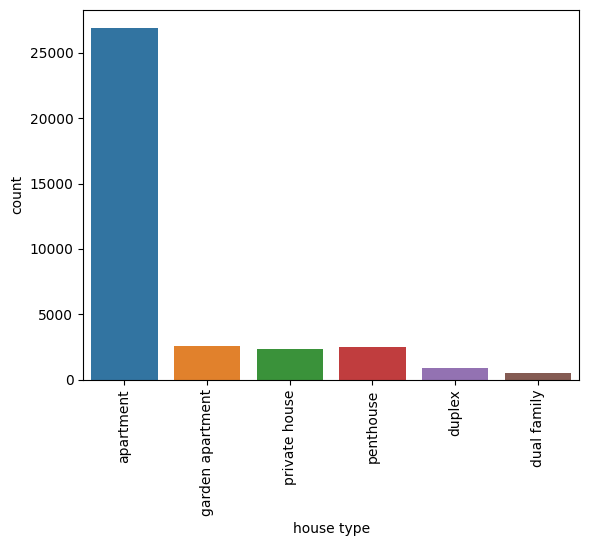

In [131]:
for col in cat_col:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=90)
    plt.show()

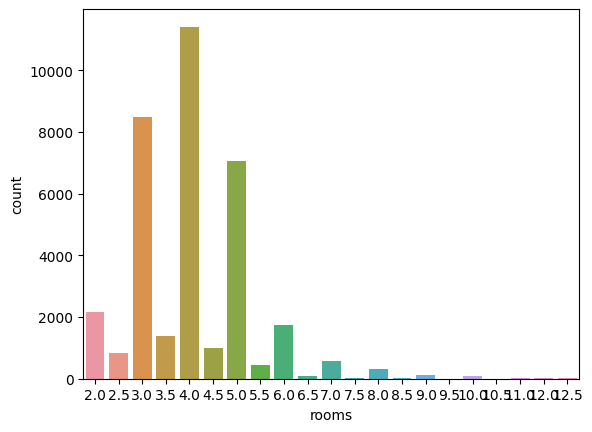

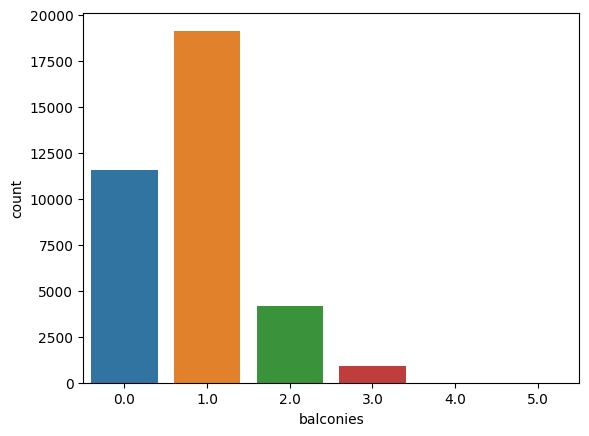

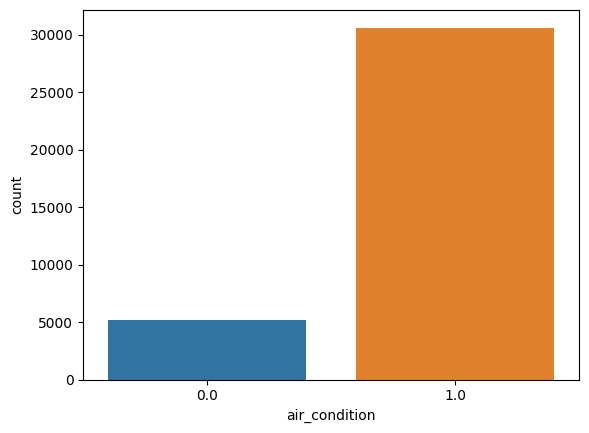

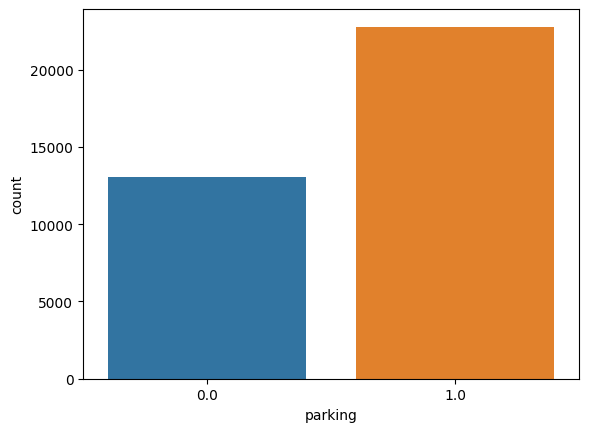

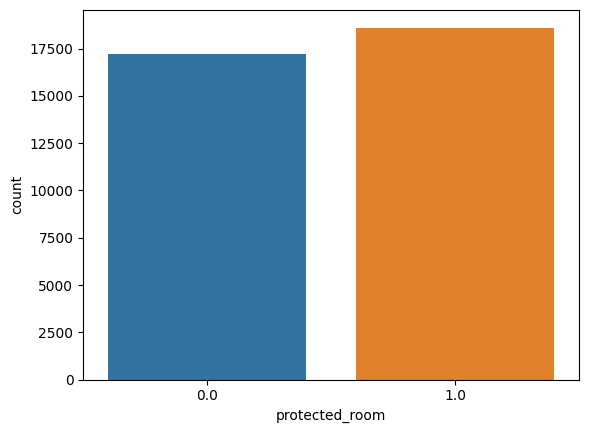

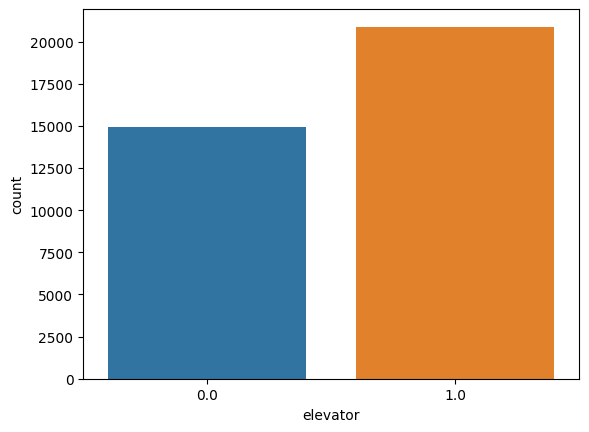

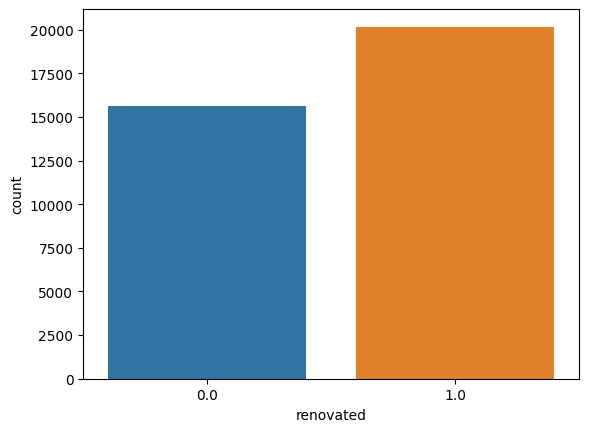

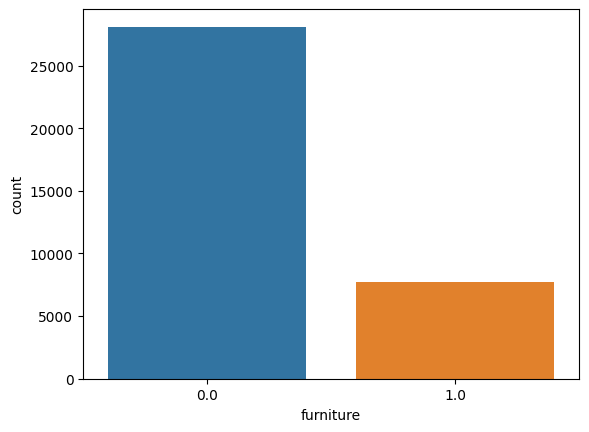

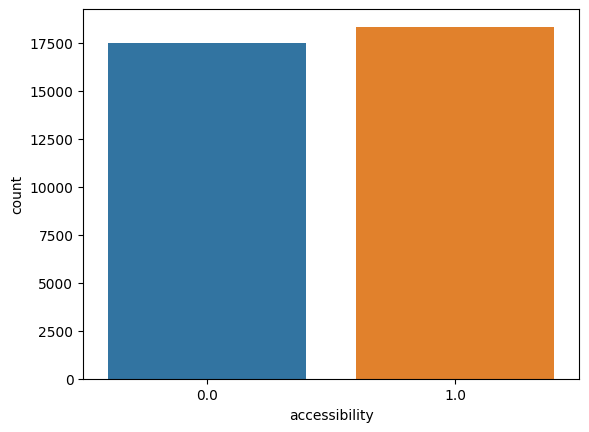

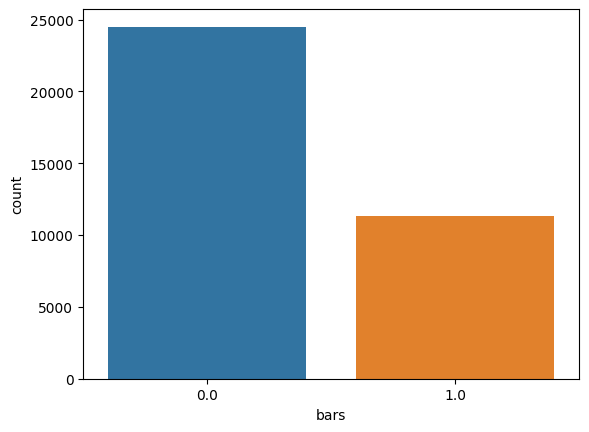

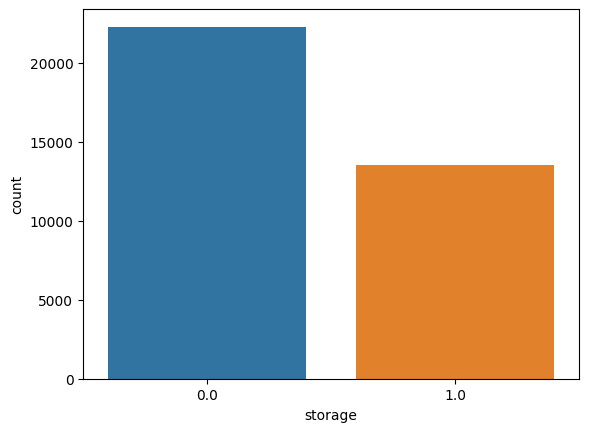

In [132]:
for col in num_col:
    if col != 'house_area' and col != 'garden_area' and col != 'price':
        sns.countplot(x=col, data=df)
        plt.show()

<Axes: >

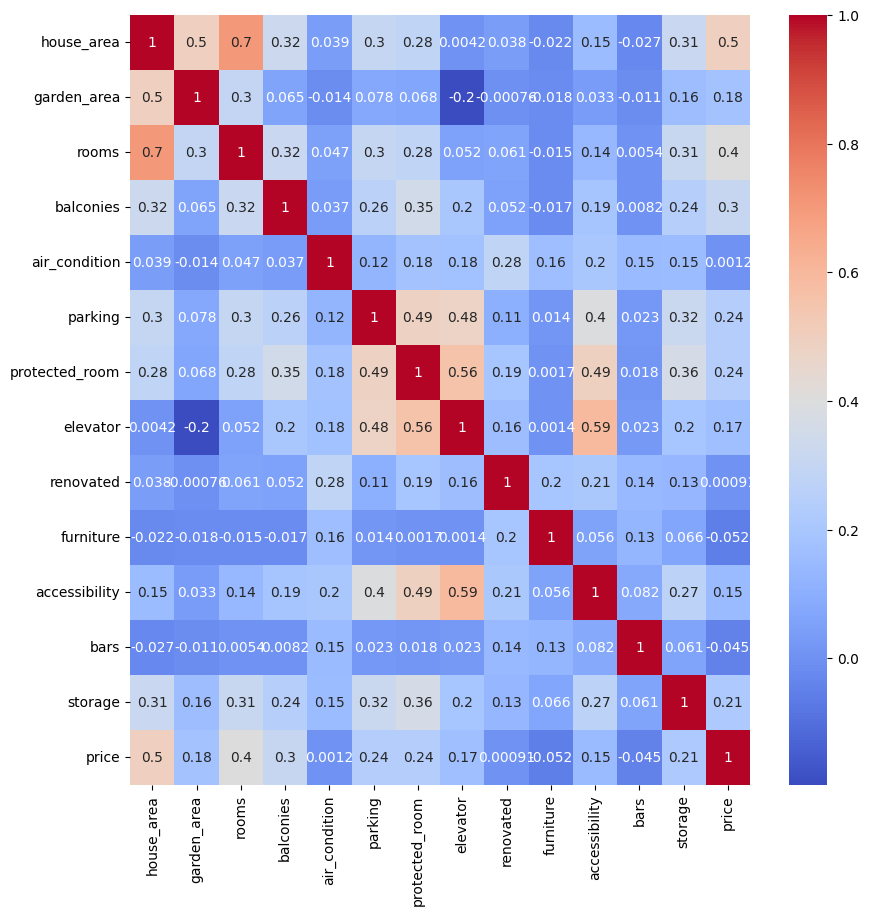

In [133]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

<a id="6"></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">6. Model Training</div>

### Label Encoding

In [134]:
city_encoder = LabelEncoder()
house_type_encoder = LabelEncoder()
df['city'] = city_encoder.fit_transform(df['city'])
df['house type'] = house_type_encoder.fit_transform(df['house type'])

### Split to train and test set

In [135]:
X = df.drop('price', axis=1)
y = np.log(df['price']) #normalize dependent variable
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## finding the best model

In [136]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train,y_train)
LR.score(x_test,y_test)

0.6728033675061154

In [137]:
from sklearn.svm import SVR

sv_reg = SVR()
sv_model = sv_reg.fit(x_train,y_train)
sv_model.score(x_test,y_test)

0.6937722064595936

In [138]:
import xgboost

gb_reg = xgboost.XGBRegressor().fit(x_train, y_train)
gb_reg.score(x_test,y_test)

0.8732237232925066

In [139]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_model = rf_reg.fit(x_train,y_train)
rf_model.score(x_test,y_test)

0.8758125264718977

In [140]:
from sklearn.tree import DecisionTreeRegressor

dt_one_reg = DecisionTreeRegressor()
dt_model = dt_one_reg.fit(x_train,y_train)
dt_model.score(x_test,y_test)

0.7962995760414442

In [141]:
from sklearn.metrics import mean_squared_error

y_pred = LR.predict(x_test)
print('linear rmse = ', np.sqrt(mean_squared_error(y_test,y_pred)))

y_pred_sv = sv_reg.predict(x_test)
print('svm rmse = ', np.sqrt(mean_squared_error(y_pred_sv,y_test)))

y_pred_gb = gb_reg.predict(x_test)
print('gb rmse = ', np.sqrt(mean_squared_error(y_pred_gb,y_test)))

y_pred_rf = rf_reg.predict(x_test)
print('rf rmse = ', np.sqrt(mean_squared_error(y_pred_rf,y_test)))

y_pred_dt = dt_one_reg.predict(x_test)
print('decision tree regressor rmse = ', np.sqrt(mean_squared_error(y_pred_dt,y_test)))

linear rmse =  0.35894423047837504
svm rmse =  0.34725208896047305
gb rmse =  0.22343003874782674
rf rmse =  0.22113702383651387
decision tree regressor rmse =  0.283216486574431


### An attemp to do grid search. took to long :(

In [142]:
'''
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')
'''

"\nfrom sklearn.model_selection import GridSearchCV, KFold, cross_val_score\n\n# Define the models\nmodels = {\n    'LinearRegression': LinearRegression(),\n    'RandomForest': RandomForestRegressor(random_state=42),\n    'XGBoost': XGBRegressor(random_state=42)\n}\n\n# Define the hyperparameter grids for each model\nparam_grids = {\n    'LinearRegression': {},\n    'RandomForest': {\n        'n_estimators': [100, 200, 500],\n        'max_depth': [None, 10, 30],\n        'min_samples_split': [2, 5, 10],\n    },\n    'XGBoost': {\n        'n_estimators': [100, 200, 500],\n        'learning_rate': [0.01, 0.1, 0.3],\n        'max_depth': [3, 6, 10],\n    }\n}\n\n# 3-fold cross-validation\ncv = KFold(n_splits=3, shuffle=True, random_state=42)\n\n# Train and tune the models\ngrids = {}\nfor model_name, model in models.items():\n    #print(f'Training and tuning {model_name}...')\n    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mea

## predict some prices

In [143]:
def predict_rows(model, row_index):

    #row_index = 3 # Index of the row you want to access
    selected_row = x_test.iloc[row_index]
    new_df = pd.DataFrame(selected_row).T
    new_df = new_df.reset_index(drop=True)
    predicted_price = model.predict(new_df)
    transformed_predicted_price = round(math.exp(predicted_price[0]))
    real_price = round(math.exp(y_test.iloc[row_index]))
    print(f"Predicted Price:{transformed_predicted_price}, Real price: {real_price}, difference: {abs(real_price - transformed_predicted_price)}")

In [144]:
for i in range(20):
    #predict_rows(rf_model, i)
    predict_rows(gb_reg, i)

Predicted Price:931876, Real price: 780000, difference: 151876
Predicted Price:5060508, Real price: 5900000, difference: 839492
Predicted Price:2639858, Real price: 2190000, difference: 449858
Predicted Price:6005566, Real price: 5900000, difference: 105566
Predicted Price:7468611, Real price: 10664450, difference: 3195839
Predicted Price:1167687, Real price: 1190000, difference: 22313
Predicted Price:1067476, Real price: 1270000, difference: 202524
Predicted Price:1867518, Real price: 2590000, difference: 722482
Predicted Price:3820363, Real price: 3690000, difference: 130363
Predicted Price:5133742, Real price: 3740000, difference: 1393742
Predicted Price:955573, Real price: 1150000, difference: 194427
Predicted Price:1686867, Real price: 1690000, difference: 3133
Predicted Price:6401652, Real price: 8700000, difference: 2298348
Predicted Price:2045332, Real price: 1750000, difference: 295332
Predicted Price:5088737, Real price: 4300000, difference: 788737
Predicted Price:5656495, Re

## Save the best model

In [145]:
import joblib
joblib.dump(gb_reg, '../models/sales_predict.pkl')

['../models/sales_predict.pkl']

In [146]:
cities_encoder_dict = {}
for name in replce_with:
    cities_encoder_dict[name] = city_encoder.transform([name])[0]
print(cities_encoder_dict)

{'tel aviv': 9, 'jerusalem': 4, 'haifa': 3, 'beer sheva': 2, 'ramat gan': 7, 'natanya': 5, 'petah tikva': 6, 'rishon lezion': 8, 'ashdod': 0, 'ashkelon': 1}


<a id="7"></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">7. Conclusion</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-color:black; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Conclusion:</font></h3>

- The aim of this Jupyter notebook is to develop a robust model for predicting house prices in Israel. We understand that the Israeli housing market is influenced by a multitude of factors, including location, size, number of rooms, proximity to amenities, and overall market trends. To capture the complex relationship between these variables and housing prices, we employ a diverse dataset consisting of historical property data, demographic information, economic indicators, and other relevant features.

- Throughout this notebook, we follow a comprehensive data science workflow. We begin by exploring and preprocessing the dataset, ensuring that the data is clean, consistent, and ready for analysis. We then employ feature engineering techniques to extract valuable insights from the available data, transforming raw variables into meaningful representations.

- Next, we proceed to model selection and evaluation, experimenting with various machine learning algorithms such as linear regression, decision trees, random forests, and gradient boosting methods. By training and testing these models on our dataset, we aim to identify the most accurate and reliable approach for predicting house prices in Israel.

- Finally, we present our findings and insights from the analysis, discussing the importance of different features in determining housing prices and highlighting any notable trends or patterns discovered. We also evaluate the performance of our predictive models, providing a quantitative assessment of their accuracy and potential applications.

- By leveraging the power of data science and machine learning, this Jupyter notebook serves as a valuable tool for understanding and predicting house prices in Israel. With its insights and predictions, it can aid various stakeholders in making informed decisions in the dynamic Israeli real estate market.

- It is possible to improve the result by doing grid search to the parameters, or using Stacked Regressions idea. You can check about it here: [Stacked Regressions](https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard)

# Thank you for reading!
![](https://media.giphy.com/media/Od0QRnzwRBYmDU3eEO/giphy.gif)